**Capstone**


Name: Dingwu Liu

Contact: dingwuliu_ca@outlook.com

Notebook: part 2 - Modeling

In [56]:
import streamlit as st

In [77]:
st.title("Kickoff - Live coding an app")


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

### Introduction
Now that we have cleaned the data and done some basic analyses, we'll continue to build some models to get a better understanding of the data. The following is columns name dictionary. 

| Numerical columns    | Meaning                                                                                                                                                                                                                                                                                             |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age                  | Imputed Age value collapsed above 80                                                                                                                                                                                                                                                                |
| Height               | Reported height in meters                                                                                                                                                                                                                                                                           |
| BMI                  | Body Mass Index (BMI)                                                                                                                                                                                                                                                                               |
| Sleep_time           | On average, how many hours of sleep do you get in a 24-hour period?                                                                                                                                                                                                                                 |
| Physical_unhealth_days | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?                                                                                                                                   |
| **Categorical columns**  |                                                                                                                                                                                                                                                                                                     |
| Heart_disease        | 0 no heart disease 1 heart disease                                                                                                                                                                                                                                                                  |
| Sex                  | 0 female 1 male                                                                                                                                                                                                                                                                                     |
| Race                 | 1 White, Non-Hispanic  2 Black, Non-Hispanic  3 Asian, Non-Hispanic  4 American Indian/Alaskan Native, Non-Hispanic  5 Hispanic  6 Other race, Non-Hispanic                                                                                                                                         |
| Smoker               | 1 Current smoker -now smokes every day  2 Current smoker -now smokes some days  3 Former smoker  4 Never smoked  9 Don't know/Refused/Missing                                                                                                                                                       |
| Heavy_drinker        | 1 No  2 Yes  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Income               | 1)   < $10,000;  2)   $10,000 ~ $15,000;  3)   $15,000 ~ $20,000;  4)   $20,000 ~ $25,000;  5)   $25,000 ~ $35,000;  6)   $35,000 ~ $50,000;  7)   $50,000 ~ $75,000;  8)   >$75,000;                                                                                                               |
| Education            | 1) Never attended school or only kindergarten  2) Grades 1 through 8 (Elementary)  3) Grades 9 through 11 (Some high school)  4) Grade 12 or GED (High school graduate)  5) College 1 year to 3 years (Some college or technical school)  6) College 4 years or more (College graduate)  9) Refused |
| Urban                | 1 Urban counties  2 Rural counties                                                                                                                                                                                                                                                                  |
| Arthritis            | 1 Diagnosed with arthritis  2 Not diagnosed with arthritis                                                                                                                                                                                                                                          |
| Physical_activity    | 1 Had physical activity or exercise during past 30 days other than their regular job  2 No physical activity or exercise in last 30 days  9 Don't know/Refused/Missing                                                                                                                              |
| Mental_health_problem:       | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Asthma:              | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| COPD                 | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Diabetes             | 1 Yes  2 Yes, but female told only during pregnancy  3 No  4 No, pre-diabetes or borderline diabetes  9 Don't know/Refused/Missing                                                                                                                                                                  |
| Kidney_disease       | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Cancer               | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |
| Stroke               | 1 Yes  2 No  9 Don't know/Refused/Missing                                                                                                                                                                                                                                                           |

In [88]:
# Import relevant libraries and modules which will be utilized in the overall report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve,confusion_matrix, precision_score,recall_score,f1_score 
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read in the cleaned data to a DataFrame
df_clean = pd.read_csv("D:/BrainStation/datasets/heart_disease_clean.csv",index_col=0)

After loading the data, we check it again, in case there were data corruption issues or the data got re-written. Let's have a look at our data.

In [3]:
# Check the first 5 rows of the dataframe
df_clean.head()

Age  Height    BMI  Sleep_time  Physical_unhealth_days  Heart_disease  Sex  \
0   56   170.0  16.60         5.0                     3.0              0    0   
1   65   163.0  29.18         7.0                     0.0              0    0   
4   80   168.0  20.34         7.0                     0.0              0    0   
5   66   175.0  26.58         8.0                    20.0              0    1   
6   75   168.0  24.21         6.0                     0.0              0    0   

   Race_1  Race_2  Race_3  ...  Diabetes_1  Diabetes_2  Diabetes_3  \
0       1       0       0  ...           1           0           0   
1       0       1       0  ...           0           0           1   
4       1       0       0  ...           0           0           1   
5       1       0       0  ...           1           0           0   
6       1       0       0  ...           0           0           1   

   Diabetes_4  Kidney_disease_1  Kidney_disease_2  Cancer_1  Cancer_2  \
0           0                 0                 1         1         0   
1           0                 0                 1         0         1   
4           0                 0                 1         0         1   
5           0                 0                 1         0         1   
6           0                 0                 1         1         0   

   Stroke_1  Stroke_2  
0         0         1  
1         0         1  
4         1         0  
5         0         1  
6         0         1  

[5 rows x 52 columns]

In [4]:
# Check the structure of the of the dataframe to ensure it is correct
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349294 entries, 0 to 394830
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      349294 non-null  int64  
 1   Height                   349294 non-null  float64
 2   BMI                      349294 non-null  float64
 3   Sleep_time               349294 non-null  float64
 4   Physical_unhealth_days   349294 non-null  float64
 5   Heart_disease            349294 non-null  int64  
 6   Sex                      349294 non-null  int64  
 7   Race_1                   349294 non-null  int64  
 8   Race_2                   349294 non-null  int64  
 9   Race_3                   349294 non-null  int64  
 10  Race_4                   349294 non-null  int64  
 11  Race_5                   349294 non-null  int64  
 12  Smoker_1                 349294 non-null  int64  
 13  Smoker_2                 349294 non-null  int64  
 14  Smok

We can see the dataframe contains 52 columns and 349,294 rows. 

We'll check number of positive cases again to make sure it's correct.

In [5]:
# Check the number of "Heart_disease" in the dataframe
df_clean["Heart_disease"].value_counts()

0    318356
1     30938
Name: Heart_disease, dtype: int64

There are 30938 positive cases in the target, accounting for about 10% of the total number. In other words, it's a huge imbalanced data.

Let's start modeling and the first step is defining the features and target first.

### Model

In [6]:
# Define target and features
X= df_clean.drop(columns="Heart_disease")
y= df_clean["Heart_disease"]

As the data is imbalanced, we'll applying the original data to get a baselline and resampling the data with upsampling, downsampling and SMOTE to compare the performances.

#### Original imbalanced data

In [7]:
# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

#### Resampling -- SMOTE, Downsampling, Upsampling

In [8]:
# SMOTE
from imblearn.over_sampling import SMOTE
X_train_sm, y_train_sm = SMOTE(random_state=1).fit_resample(X_train, y_train)

# check what SMOTE has done
print('Original class distribution')
display(pd.Series(y_train).value_counts().sort_index())

print('\nResampled class distribution')
display(pd.Series(y_train_sm).value_counts().sort_index())

Original class distribution


0    254685
1     24750
Name: Heart_disease, dtype: int64


Resampled class distribution


0    254685
1    254685
Name: Heart_disease, dtype: int64

In [9]:
from sklearn.utils import resample  
# Downsample                       
print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=123)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_down = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_down = np.hstack((y_train[y_train == 1], y_downsampled))

Number of class 0 examples before: 254685
Number of class 0 examples after: 24750


In [10]:
# Upsample
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_up = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_up = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 24750
Number of class 1 examples after: 254685


Now let's fit the original data and resampling data into statsmodel.

#### Logistic Regression ---statsmodels as baseline 

In [11]:
# Scaling the data

# Instantiate
ss= StandardScaler()
# Fit the model
ss.fit(X_train)
# Transform the train and test
X_train_ss =ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [12]:
# The transformed data is an array, let's convert it to a dataframe 
X_train_ss = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns,index=y_train.index)

In [13]:
# Add a constant
X_const=sm.add_constant(X_train_ss)
# Build and fit stats_model to the data
stats_model = sm.Logit(y_train, X_const)
stats_model =stats_model.fit()
stats_model.summary()

Optimization terminated successfully.
         Current function value: 0.235972
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart_disease   No. Observations:               279435
Model:                          Logit   Df Residuals:                   279383
Method:                           MLE   Df Model:                           51
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:                  0.2114
Time:                        20:35:41   Log-Likelihood:                -65939.
converged:                       True   LL-Null:                       -83613.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.0612      0.011   -267.799      0.000      -3.084      -3.039
Age                         0.9774      0.012     78.757      0.000       0.953       1.002
Height                     -0.0456      0.011     -4.268      0.000      -0.067      -0.025
BMI                         0.0762      0.008      9.925      0.000       0.061       0.091
Sleep_time                 -0.0460      0.007     -6.964      0.000      -0.059      -0.033
Physical_unhealth_days      0.1551      0.006     25.920      0.000       0.143       0.167
Sex                         0.4216      0.011     39.098      0.000       0.400       0.443
Race_1                     -0.0147      0.018     -0.834      0.404      -0.049       0.020
Race_2                     -0.0596      0.013     -4.475      0.000      -0.086      -0.033
Race_3                     -0.0705      0.013     -5.361      0.000      -0.096      -0.045
Race_4                      0.0030      0.009      0.348      0.728      -0.014       0.020
Race_5                     -0.0549      0.014     -3.820      0.000      -0.083      -0.027
Smoker_1                    0.0769      0.018      4.177      0.000       0.041       0.113
Smoker_2                    0.0676      0.013      5.268      0.000       0.042       0.093
Smoker_3                    0.0860      0.026      3.326      0.001       0.035       0.137
Smoker_4                   -0.0392      0.029     -1.360      0.174      -0.096       0.017
Heavy_drinker_1            -0.0119      0.013     -0.919      0.358      -0.037       0.013
Heavy_drinker_2            -0.0647      0.013     -4.887      0.000      -0.091      -0.039
Income_1                    0.0334      0.007      4.731      0.000       0.020       0.047
Income_2                    0.0239      0.007      3.621      0.000       0.011       0.037
Income_3                    0.0264      0.007      3.657      0.000       0.012       0.041
Income_4                    0.0215      0.008      2.826      0.005       0.007       0.036
Income_5                    0.0048      0.008      0.606      0.544      -0.011       0.020
Income_6                   -0.0254      0.009     -2.897      0.004      -0.043      -0.008
Income_7                   -0.0252      0.009     -2.676      0.007      -0.044      -0.007
Income_8                   -0.0726      0.012     -6.256      0.000      -0.095      -0.050
Education_1                 0.0032      0.008      0.384      0.701      -0.013       0.019
Education_2                 0.0206      0.020      1.019      0.308      -0.019       0.060
Education_3                 0.0223      0.031      0.720      0.472      -0.038       0.083
Education_4                 0.0138      0.066      0.208      0.835      -0.117       0.144
Education_5                 0.0196      0.068      0.291      0.771      -0.113       0.152
Education_6                -0.0479      0.074     -0.652      0.515      -0.192       0.096
Urban_1              

- The coefficient of age and sex is the largest two in all the variables and P value of these two variable equal to zero, which means that the dominant risk factors for the heart disease.
- Some other variables include smoking, high BMI, diabetes, arthritis, stroke, asthma and kidney and mental issues has a positive coefficient, which means those are risk factors.(P < 0.05 as well)
- Variables like physical activity, enough sleeping time, higher education and living in urbanization have a negative coefficient(P<0.05), which means these are helpful for combating heart disease.

In [14]:
# Scaling the data

# Instantiate
ss= StandardScaler()
# Fit the model
ss.fit(X_train)
# Transform the train and test
X_train_down_ss =ss.transform(X_train_down)
X_test_ss = ss.transform(X_test)

# The transformed data is an array, let's convert it to a dataframe 
X_train_ss = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns,index=y_train.index)

# Add a constant
X_const=sm.add_constant(X_train_ss)
# Build and fit stats_model to the data
stats_model = sm.Logit(y_train, X_const)
stats_model =stats_model.fit()
stats_model.summary()

Optimization terminated successfully.
         Current function value: 0.235972
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Heart_disease   No. Observations:               279435
Model:                          Logit   Df Residuals:                   279383
Method:                           MLE   Df Model:                           51
Date:                Mon, 26 Sep 2022   Pseudo R-squ.:                  0.2114
Time:                        20:35:44   Log-Likelihood:                -65939.
converged:                       True   LL-Null:                       -83613.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.0612      0.011   -267.799      0.000      -3.084      -3.039
Age                         0.9774      0.012     78.757      0.000       0.953       1.002
Height                     -0.0456      0.011     -4.268      0.000      -0.067      -0.025
BMI                         0.0762      0.008      9.925      0.000       0.061       0.091
Sleep_time                 -0.0460      0.007     -6.964      0.000      -0.059      -0.033
Physical_unhealth_days      0.1551      0.006     25.920      0.000       0.143       0.167
Sex                         0.4216      0.011     39.098      0.000       0.400       0.443
Race_1                     -0.0147      0.018     -0.834      0.404      -0.049       0.020
Race_2                     -0.0596      0.013     -4.475      0.000      -0.086      -0.033
Race_3                     -0.0705      0.013     -5.361      0.000      -0.096      -0.045
Race_4                      0.0030      0.009      0.348      0.728      -0.014       0.020
Race_5                     -0.0549      0.014     -3.820      0.000      -0.083      -0.027
Smoker_1                    0.0769      0.018      4.177      0.000       0.041       0.113
Smoker_2                    0.0676      0.013      5.268      0.000       0.042       0.093
Smoker_3                    0.0860      0.026      3.326      0.001       0.035       0.137
Smoker_4                   -0.0392      0.029     -1.360      0.174      -0.096       0.017
Heavy_drinker_1            -0.0119      0.013     -0.919      0.358      -0.037       0.013
Heavy_drinker_2            -0.0647      0.013     -4.887      0.000      -0.091      -0.039
Income_1                    0.0334      0.007      4.731      0.000       0.020       0.047
Income_2                    0.0239      0.007      3.621      0.000       0.011       0.037
Income_3                    0.0264      0.007      3.657      0.000       0.012       0.041
Income_4                    0.0215      0.008      2.826      0.005       0.007       0.036
Income_5                    0.0048      0.008      0.606      0.544      -0.011       0.020
Income_6                   -0.0254      0.009     -2.897      0.004      -0.043      -0.008
Income_7                   -0.0252      0.009     -2.676      0.007      -0.044      -0.007
Income_8                   -0.0726      0.012     -6.256      0.000      -0.095      -0.050
Education_1                 0.0032      0.008      0.384      0.701      -0.013       0.019
Education_2                 0.0206      0.020      1.019      0.308      -0.019       0.060
Education_3                 0.0223      0.031      0.720      0.472      -0.038       0.083
Education_4                 0.0138      0.066      0.208      0.835      -0.117       0.144
Education_5                 0.0196      0.068      0.291      0.771      -0.113       0.152
Education_6                -0.0479      0.074     -0.652      0.515      -0.192       0.096
Urban_1              

The result seems the same the original one.

In [60]:
# Calculate the odds_ratio
odds_ratio = np.exp(stats_model.params)
# Create a dataframe to visualize the odds_ratio
coeffs_df = pd.DataFrame({"coef": stats_model.params, "odds_ratio": odds_ratio, 'p-value':stats_model.pvalues})
coeffs_df

coef  odds_ratio        p-value
const                   -3.061178    0.046833   0.000000e+00
Age                      0.977425    2.657604   0.000000e+00
Height                  -0.045601    0.955424   1.969860e-05
BMI                      0.076188    1.079166   3.245145e-23
Sleep_time              -0.045977    0.955064   3.304885e-12
Physical_unhealth_days   0.155077    1.167748  4.000012e-148
Sex                      0.421569    1.524351   0.000000e+00
Race_1                  -0.014750    0.985359   4.044434e-01
Race_2                  -0.059559    0.942180   7.630465e-06
Race_3                  -0.070527    0.931902   8.273889e-08
Race_4                   0.003048    1.003053   7.279709e-01
Race_5                  -0.054898    0.946581   1.332036e-04
Smoker_1                 0.076905    1.079940   2.954547e-05
Smoker_2                 0.067618    1.069957   1.377390e-07
Smoker_3                 0.086011    1.089818   8.810816e-04
Smoker_4                -0.039191    0.961567   1.737706e-01
Heavy_drinker_1         -0.011903    0.988168   3.579494e-01
Heavy_drinker_2         -0.064748    0.937303   1.023182e-06
Income_1                 0.033448    1.034014   2.236193e-06
Income_2                 0.023855    1.024142   2.938895e-04
Income_3                 0.026440    1.026793   2.556610e-04
Income_4                 0.021494    1.021726   4.710766e-03
Income_5                 0.004806    1.004818   5.442692e-01
Income_6                -0.025404    0.974916   3.764956e-03
Income_7                -0.025244    0.975072   7.459913e-03
Income_8                -0.072569    0.930001   3.960286e-10
Education_1              0.003172    1.003177   7.010188e-01
Education_2              0.020600    1.020813   3.079963e-01
Education_3              0.022292    1.022542   4.716193e-01
Education_4              0.013822    1.013918   8.353344e-01
Education_5              0.019633    1.019827   7.713683e-01
Education_6             -0.047925    0.953205   5.145464e-01
Urban_1                 -0.020773    0.979442   2.584667e-03
Arthritis_1              0.138878    1.148984   1.314386e-79
Physical_activity_1     -0.073136    0.929475   2.763871e-01
Physical_activity_2     -0.048121    0.953018   4.734829e-01
Mental_health_problem_1  0.151268    1.163308   1.402949e-03
Mental_health_problem_2  0.072470    1.075160   1.268267e-01
Asthma_1                 0.098232    1.103218   3.792466e-02
Asthma_2                 0.033938    1.034520   4.739842e-01
COPD_1                   0.004029    1.004037   8.634249e-01
COPD_2                  -0.166640    0.846504   1.611144e-12
Diabetes_1               0.247974    1.281427   7.333324e-04
Diabetes_2               0.022260    1.022510   3.032231e-01
Diabetes_3               0.044098    1.045085   5.816318e-01
Diabetes_4               0.031668    1.032174   3.237100e-01
Kidney_disease_1         0.028954    1.029377   1.158038e-01
Kidney_disease_2        -0.102158    0.902886   3.526979e-08
Cancer_1                -0.041867    0.958997   2.449272e-01
Cancer_2                -0.073880    0.928783   4.038517e-02
Stroke_1                 0.067902    1.070261   1.635539e-03
Stroke_2                -0.155198    0.856246   8.023909e-13

Text(0.5, 1.0, 'Coefficient of heart disease')

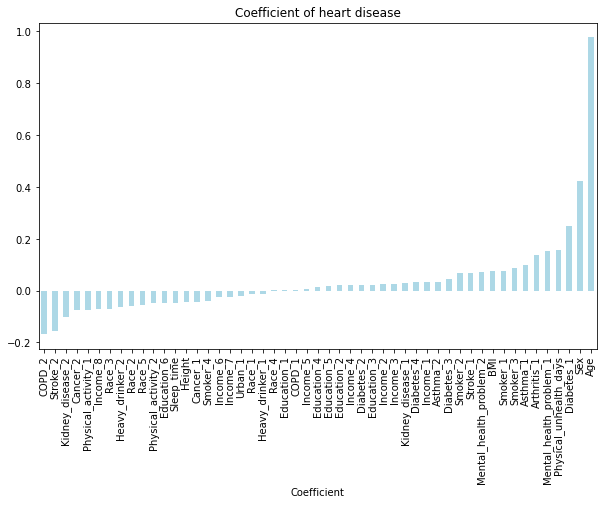

In [72]:
coeffs_df.drop('const').sort_values(by='coef')['coef'].plot(kind= 'bar',color = 'lightblue',figsize=(10,6))
plt.xlabel('Coefficient')
plt.title('Coefficient of heart disease')

- The dominant risk factors for the heart disease are age and sex.
- Some other risk factors include smoking, high BMI, diabetes, arthritis, stroke, asthma and kidney and mental issues.
- Physical activity, enough sleeping time, appropriate BMI, higher education and living in urbanization are good for combating heart disease.

In [62]:
# Filter p- value < 0.05
coeffs_df1= coeffs_df[coeffs_df['p-value']<=0.05].drop(index='const')
coeffs_df1

coef  odds_ratio        p-value
Age                      0.977425    2.657604   0.000000e+00
Height                  -0.045601    0.955424   1.969860e-05
BMI                      0.076188    1.079166   3.245145e-23
Sleep_time              -0.045977    0.955064   3.304885e-12
Physical_unhealth_days   0.155077    1.167748  4.000012e-148
Sex                      0.421569    1.524351   0.000000e+00
Race_2                  -0.059559    0.942180   7.630465e-06
Race_3                  -0.070527    0.931902   8.273889e-08
Race_5                  -0.054898    0.946581   1.332036e-04
Smoker_1                 0.076905    1.079940   2.954547e-05
Smoker_2                 0.067618    1.069957   1.377390e-07
Smoker_3                 0.086011    1.089818   8.810816e-04
Heavy_drinker_2         -0.064748    0.937303   1.023182e-06
Income_1                 0.033448    1.034014   2.236193e-06
Income_2                 0.023855    1.024142   2.938895e-04
Income_3                 0.026440    1.026793   2.556610e-04
Income_4                 0.021494    1.021726   4.710766e-03
Income_6                -0.025404    0.974916   3.764956e-03
Income_7                -0.025244    0.975072   7.459913e-03
Income_8                -0.072569    0.930001   3.960286e-10
Urban_1                 -0.020773    0.979442   2.584667e-03
Arthritis_1              0.138878    1.148984   1.314386e-79
Mental_health_problem_1  0.151268    1.163308   1.402949e-03
Asthma_1                 0.098232    1.103218   3.792466e-02
COPD_2                  -0.166640    0.846504   1.611144e-12
Diabetes_1               0.247974    1.281427   7.333324e-04
Kidney_disease_2        -0.102158    0.902886   3.526979e-08
Cancer_2                -0.073880    0.928783   4.038517e-02
Stroke_1                 0.067902    1.070261   1.635539e-03
Stroke_2                -0.155198    0.856246   8.023909e-13

Text(0.5, 1.0, 'Coefficient of heart disease')

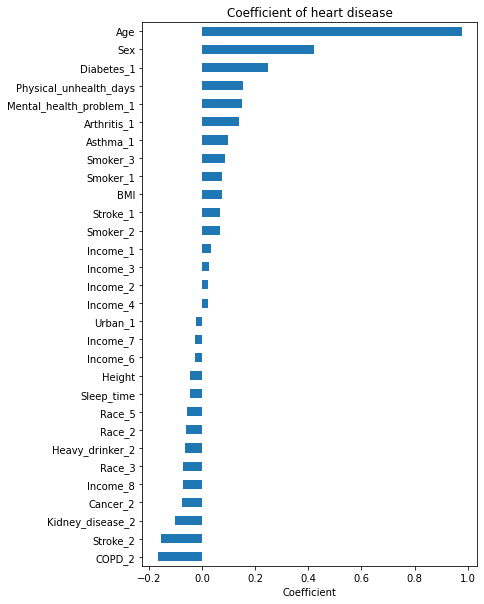

In [63]:
#Plot
coeffs_df1.sort_values(by='coef')['coef'].plot(kind= 'barh',figsize=(6,10))
plt.xlabel('Coefficient')
plt.title('Coefficient of heart disease')

##### define fuction

Let's create a function to make life easier. This function will take train and test data (both X and y), scale these data and fit train data in a model. Then it can automatically output the accuracy score(both train and test), confusion matrix and plot the ROC curve(both train and test) for us. The function can be used by different model.

In [18]:
# Defining the function that will automatically output train, test accuracy, confusion matrix and plot ROC curve of different models
def score_roc_model(X_train,X_test,y_train,y_test,model):
    """
    The function takes splitted train, test data(both X and y), fit model and outputs accuracy,confusion matrix of the model 
    
    and plot the ROC curve. The function returns the model.
    """
    # Scaling
    ss=StandardScaler()
    ss.fit(X_train)
    X_train_ss= ss.transform(X_train)
    X_test_ss=ss.transform(X_test)
    # Fit the model
    model.fit(X_train_ss,y_train)
    
    # Print the accuracy
    print(f'Train accuracy: {model.score(X_train_ss,y_train)*100:0.3f}')
    print(f'Test accuracy: {model.score(X_test_ss,y_test)*100:0.3f}')
    # Predict classification
    y_test_pred= model.predict(X_test_ss)

    # Confusion matrix
    conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
    )
    display(conmat)
    print(f'Recall score of test: {recall_score(y_test, y_test_pred)*100:0.1f}%')
    print(f'Precision score of test: {precision_score(y_test, y_test_pred)*100:0.1f}%')
    print(f'F1 score of test: {f1_score(y_test, y_test_pred)*100:0.1f}%')
    
    # Plot ROC curve of the train and test
    fig, ax = plt.subplots(1,1)
    plot_roc_curve(model, X_train_ss, y_train, ax=ax, marker ='o')
    # Random guess line
    plt.plot([0,1],[0,1], color='black', linestyle='--')
    plot_roc_curve(model, X_test_ss, y_test, ax=ax, marker='.')
    plt.title(f'ROC for Train & Test for {model}')
    plt.show()
    
    # Return the model
    return model


#### Logistic Regression 
Let's use the function to get the score, confusion matrix and plot the ROC curve for Logistic Regression.

We'll start with using the original X_train and y_train.

##### Original data without sampling

Train accuracy: 91.310
Test accuracy: 91.297


predicted 0  predicted 1
true 0        63107          564
true 1         5516          672

Recall score of test: 10.9%
Precision score of test: 54.4%
F1 score of test: 18.1%


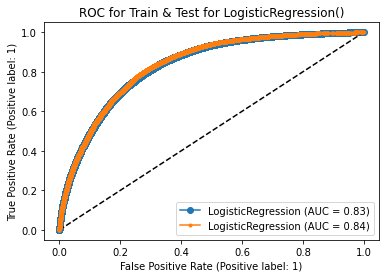

LogisticRegression()

In [19]:
score_roc_model(X_train,X_test,y_train,y_test,LogisticRegression())

- Both the train and test accuracy is quite high about 91%. 
- Looking at the recall, which is about 10%, means that the model is not sensitive to positive cases. The confusion matrix tells us that we mispredict most of the true positives to negatives. The true positive case is the person we want to identify with all our efforts. So the model is not good enough.
- ROC curve of the train and test overlap. No overfitting in the ROC curve. 

We'll apply resampled data to the Logistic Regression model.

##### Downing sampling

Train accuracy: 75.588
Test accuracy: 74.517


predicted 0  predicted 1
true 0        47243        16428
true 1         1374         4814

Recall score of test: 77.8%
Precision score of test: 22.7%
F1 score of test: 35.1%


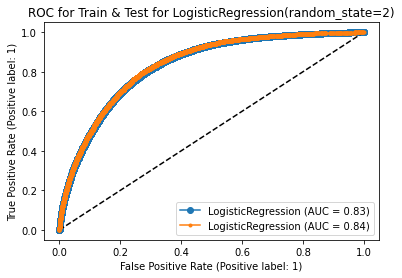

LogisticRegression(random_state=2)

In [20]:
score_roc_model(X_train_down,X_test,y_train_down,y_test,LogisticRegression(random_state=2))

Applying the downsampling:
- Both the train and test accuracy drop a little bit.
- The recall increases from 10% to 77%, which means the model is more sensitive to positive cases. That's what we want, even though the precision drops significantly.
- ROC curve seem to stay the same.

- We'll optimize the sample size of the negatives(y=0) and the C value to improve recall performance.

###### Optimize hyperparameters

In [21]:
# Set the C_range
C_range= 10.**np.arange(-5,0)

# Create blank lists as containers to hold recall, precision, f1_score of different sample size
recall_score_list=[]
precision_score_list=[]
f1_score_list=[]

# Generate a for loop to change the sample size of negatives(y_train=0)
for i in range(1,10):
    X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0]*i, # Change the sample by multiplying i
                                        random_state=123)
    X_train_down = np.vstack((X_train[y_train == 1], X_downsampled))
    y_train_down = np.hstack((y_train[y_train == 1], y_downsampled))
    
    # Create blank lists as containers to hold recall, precision, f1_score for different C values
    recall=[]
    precision=[]
    f1=[]
 
    for C in C_range:
        # Scaling
        ss=StandardScaler()
        ss.fit(X_train_down)
        X_train_down_ss= ss.transform(X_train_down)
        X_test_ss=ss.transform(X_test)
        # Instantiate and fit
        LR_model = LogisticRegression(C=C)
        LR_model.fit(X_train_down_ss,y_train_down)

        # Predict classification
        y_test_pred= LR_model.predict(X_test_ss)
        # Append the scores
        recall.append(recall_score(y_test, y_test_pred))
        precision.append(precision_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        
    # Append the above scores   
    recall_score_list.append(recall)
    precision_score_list.append(precision)
    f1_score_list.append(f1)
    
   

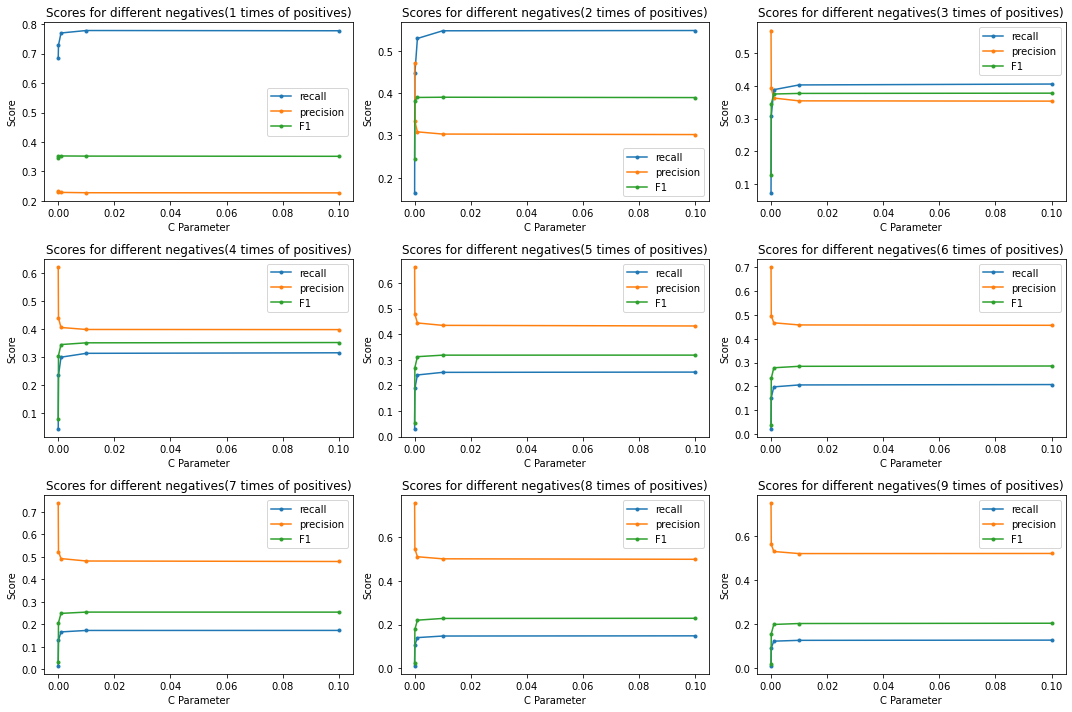

In [22]:
# Plot the scores for different negative sample size and C values
plt.subplots(3,3,figsize=(15,10))
# Create a for loop meaning diffrent sample size
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.title(f'Scores for different negatives({i} times of positives)')
    # Plot the recall_score, precision_score and f1_socre from the above
    plt.plot(C_range,recall_score_list[i-1],label='recall',marker='.')
    plt.plot(C_range,precision_score_list[i-1],label='precision',marker='.')
    plt.plot(C_range,f1_score_list[i-1],label='F1',marker='.')
    plt.xlabel('C Parameter')
    plt.ylabel('Score')
    plt.title
    plt.legend()
plt.tight_layout()
plt.show()

 - From the visual above, we can see that when the negatives increase, the recall scores decease, the precision scores increase and F1 scores increase first and then decease. 
 - When C value increase,the recall and F1 increase at first and then flatten, while precision decease and then flatten.
 - Ignoring positive heart disease can have severe consequences, we want to have a high recall. In this case, we set negative sample size equal to the positive and C value to 0.01, as the recall reaches its peak.

Train accuracy: 75.618
Test accuracy: 74.575


predicted 0  predicted 1
true 0        47278        16393
true 1         1369         4819

Recall score of test: 77.9%
Precision score of test: 22.7%
F1 score of test: 35.2%


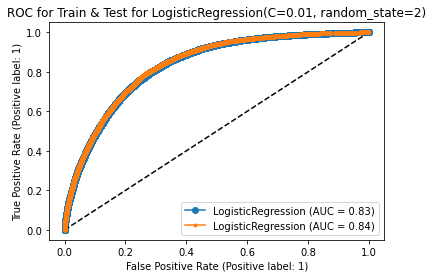

LogisticRegression(C=0.01, random_state=2)

In [82]:
score_roc_model(X_train_down,X_test,y_train_down,y_test,LogisticRegression(C=0.01,random_state=2))

(Please rerun the Downsampling) 
After tuning the sample size and C value:

- Both the train and test accuracy drop.
- The recall increases from 54.3% to 77.9%, while the precison drops from 30% to 22%.
- ROC curve stay the same.

##### Upsampling
In the next step, we'll use upsampling and fit to the Logistic Regression model.

###### Optimize hyperparameters

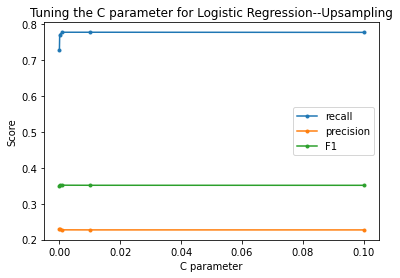

In [24]:
# Create blank lists as containers to hold recall, precision, f1_score for different C values
recall=[]
precision=[]
f1=[]

# Set the C_range
for C in C_range:
    # Scaling
    ss=StandardScaler()
    ss.fit(X_train_up)
    X_train_up_ss= ss.transform(X_train_up)
    X_test_ss=ss.transform(X_test)
    # Instantiate the model
    LR_model = LogisticRegression(C=C)
    # Fit the model
    LR_model.fit(X_train_up_ss,y_train_up)

    # Predict classification
    y_test_pred= LR_model.predict(X_test_ss)
    # Append the scores for different c values
    recall.append(recall_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    f1.append(f1_score(y_test, y_test_pred))
# Plot    
plt.figure()
plt.plot(C_range,recall,label='recall',marker='.')
plt.plot(C_range,precision,label='precision',marker='.')
plt.plot(C_range,f1,label='F1',marker='.')
plt.ylabel("Score")
plt.xlabel("C parameter")
plt.title("Tuning the C parameter for Logistic Regression--Upsampling")
plt.legend()
plt.show()

  From the visual above:
 - When C value increase,the recall increase at first and then flatten. The precision and F1 seem flatten from the beginning.
 - We want to have a high recall, so C should be set at 0.01.

Train accuracy: 75.587
Test accuracy: 74.552


predicted 0  predicted 1
true 0        47267        16404
true 1         1374         4814

Recall score of test: 77.8%
Precision score of test: 22.7%
F1 score of test: 35.1%


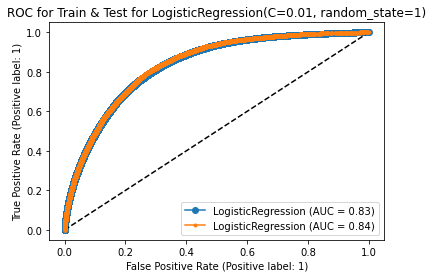

LogisticRegression(C=0.01, random_state=1)

In [84]:
score_roc_model(X_train_up,X_test,y_train_up,y_test,LogisticRegression(C=0.01,random_state=1))

(Please rerun the Upsampling)
After tuning C value:
- The train accuracy is 75% and test accuracy is 74%. No overfitting.
- The recall is 77.8%, which is quite high. The precison 22%.
- ROC curve stay the same.

##### SMOTE

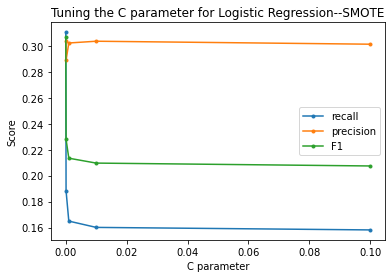

In [26]:
# Create blank lists as containers to hold recall, precision, f1_score for different C values
recall=[]
precision=[]
f1=[]

# Set the C_range
for C in C_range:
    #Scaling
    ss=StandardScaler()
    ss.fit(X_train_sm)
    X_train_sm_ss= ss.transform(X_train_sm)
    X_test_ss=ss.transform(X_test)
    #Instantiate and fit
    LR_model = LogisticRegression(C=C)
    LR_model.fit(X_train_sm_ss,y_train_sm)

    # predict classification
    y_test_pred= LR_model.predict(X_test_ss)
    # Append scores
    recall.append(recall_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    f1.append(f1_score(y_test, y_test_pred))

# Plot 
plt.figure()
plt.plot(C_range,recall,label='recall',marker='.')
plt.plot(C_range,precision,label='precision',marker='.')
plt.plot(C_range,f1,label='F1',marker='.')
plt.ylabel("Score")
plt.xlabel("C parameter")
plt.title("Tuning the C parameter for Logistic Regression--SMOTE")
plt.legend()
plt.show()

  From the visual above:
 - When C value increase, the recall and F1 drop significantly at first and then flatten. The precision increase a little at first and flatten afterward.
 - We want to have a high recall, so C should be set at the lowest.

Train accuracy: 91.599
Test accuracy: 88.703


predicted 0  predicted 1
true 0        60802         2869
true 1         5023         1165

Recall score of test: 18.8%
Precision score of test: 28.9%
F1 score of test: 22.8%


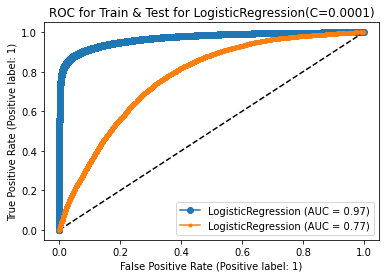

LogisticRegression(C=0.0001)

In [86]:
score_roc_model(X_train_sm,X_test,y_train_sm,y_test,LogisticRegression(C=0.0001))

- SMOTE seems not good. The recall is about 19%.

Let's try a different model.

#### SVM

##### Original data without sampling

Applying the `score_roc_model` to get accuracy, confusion matrix and ROC curve.

Train accuracy: 91.295
Test accuracy: 91.302


predicted 0  predicted 1
true 0        63536          135
true 1         5941          247

Recall score of test: 4.0%
Precision score of test: 64.7%
F1 score of test: 7.5%


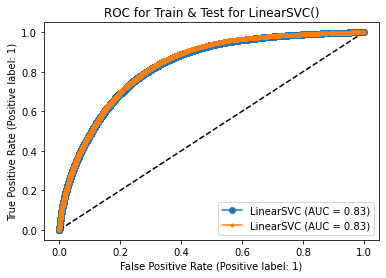

LinearSVC()

In [28]:
score_roc_model(X_train,X_test,y_train,y_test,LinearSVC())

As with the Logistic Regression, the SVM model has high accuracy but poor recall.

Let's define a function to optimize hyperparameter.

In [29]:
# Defining a function that will automatically plot the curve of recall, precision and F1
def optimization_parameter(X_train,X_test,y_train,y_test):
    """
    The function takes splitted train, test data(both X and y), fit model and plot the curve of recall, precision and F1. 
    
    """
    # Create lists to hold scores
    recall=[]
    precision=[]
    f1=[]
    C_range= 10.**np.arange(-5,-1)
    
    # Generate a for loop for different C
    for C in C_range:
        #Scaling
        ss=StandardScaler()
        ss.fit(X_train)
        X_train_ss= ss.transform(X_train)
        X_test_ss=ss.transform(X_test)
        #Instantiate and fit
        SVM_model = LinearSVC(C=C)
        SVM_model.fit(X_train_ss,y_train)

        # predict classification
        y_test_pred= SVM_model.predict(X_test_ss)
        # Append Score to list
        recall.append(recall_score(y_test, y_test_pred))
        precision.append(precision_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
    # Plot
    plt.figure()
    plt.plot(C_range,recall,label='recall',marker='.')
    plt.plot(C_range,precision,label='precision',marker='.')
    plt.plot(C_range,f1,label='F1',marker='.')
    plt.ylabel("Score")
    plt.xlabel("C parameter")
    plt.title("Tuning the C parameter for Logistic Regression")
    plt.legend()
    plt.show()
    # Return none
    return None

##### Downsampling 
 Applying the function created above to plot the curve of recall, precision and F1 

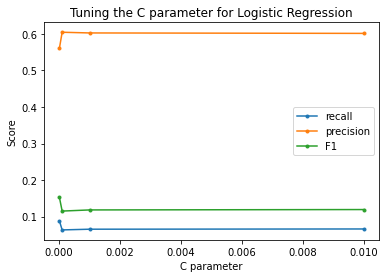

In [30]:
optimization_parameter(X_train_down,X_test,y_train_down,y_test)

- When C value increase, the recall increase at first and then flattens. The precision and F1 seem flattening.
- We want to have a high recall, so C should be set at 0.001.

Train accuracy: 75.580
Test accuracy: 74.045


predicted 0  predicted 1
true 0        46873        16798
true 1         1334         4854

Recall score of test: 78.4%
Precision score of test: 22.4%
F1 score of test: 34.9%


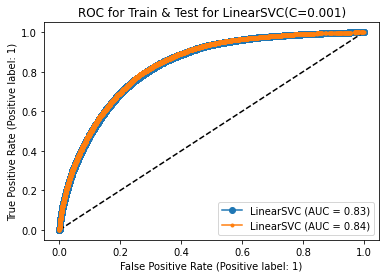

LinearSVC(C=0.001)

In [88]:
score_roc_model(X_train_down,X_test,y_train_down,y_test,LinearSVC(C=0.001))

- The train accuracy is 75% and test accuracy is 74%. No overfitting.
- The recall is poor. 
- ROC curve stay the same.

##### Upsampling
Applying the function to plot the curve of recall, precision and F1

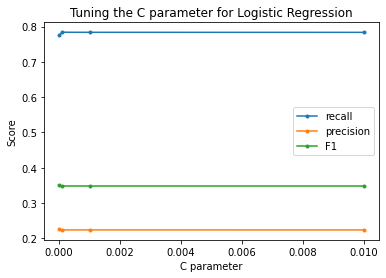

In [32]:
optimization_parameter(X_train_up,X_test,y_train_up,y_test)

- When C value increase, the recall increase at first and then flattens. The precision and F1 seem flattening.
- We want to have a high recall, so C should be set at 0.001.

Train accuracy: 75.593
Test accuracy: 74.008


predicted 0  predicted 1
true 0        46851        16820
true 1         1338         4850

Recall score of test: 78.4%
Precision score of test: 22.4%
F1 score of test: 34.8%


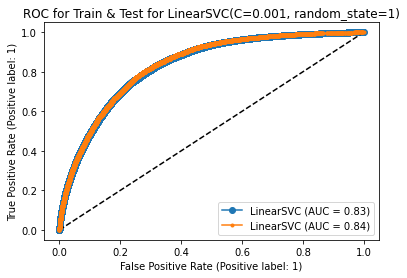

LinearSVC(C=0.001, random_state=1)

In [90]:
score_roc_model(X_train_up,X_test,y_train_up,y_test,LinearSVC(C=0.001,random_state=1))

- The train and test accuracy don't vary very much.  
- The recall is 78.4%. So far, it's the highest. The precison 22%.
- ROC curve stay the same.

#### DecisionTree Model

##### Original data

Let's use the function to get the score, confusion matrix and plot the ROC curve for Decision Tree.

We'll start with using the original X_train and y_train.

Train accuracy: 99.975
Test accuracy: 85.459


predicted 0  predicted 1
true 0        58159         5512
true 1         4646         1542

Recall score of test: 24.9%
Precision score of test: 21.9%
F1 score of test: 23.3%


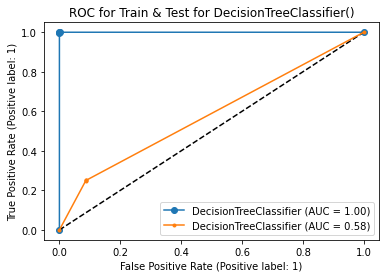

DecisionTreeClassifier()

In [34]:
score_roc_model(X_train,X_test,y_train,y_test,DecisionTreeClassifier())

- The model is seriously overfitting.
- The recall is not high enough.

 We'll define a function as in the SVM model to make life easier.

In [35]:
# Defining a function that will automatically plot the curve of recall, precision and F1
def DT_parameter(X_train,X_test,y_train,y_test):
    """
    The function takes splitted train, test data(both X and y), fit model and plot the curve of recall, precision and F1.

    """
    # Create lists to hold scores
    recall=[]
    precision=[]
    f1=[]
    
    # Create lists to hold scores
    for depth in range(1,10):
        #Instantiate and fit
        DT_model =DecisionTreeClassifier(max_depth =depth)
        DT_model.fit(X_train,y_train)

        # predict classification
        y_test_pred= DT_model.predict(X_test)
        # Append Scores to lists
        recall.append(recall_score(y_test, y_test_pred))
        precision.append(precision_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
    # Plot
    plt.figure()
    plt.plot(range(1,10),recall,label='recall',marker='.')
    plt.plot(range(1,10),precision,label='precision',marker='.')
    plt.plot(range(1,10),f1,label='F1',marker='.')
    plt.ylabel("Score")
    plt.xlabel("Depth parameter")
    plt.title("Tuning the parameter for DecisionTree")
    plt.legend()
    plt.show()
    # Return none
    return None

##### Downsampling
Applying the function (`DT_parameter`) created above to plot the curve of recall, precision and F1

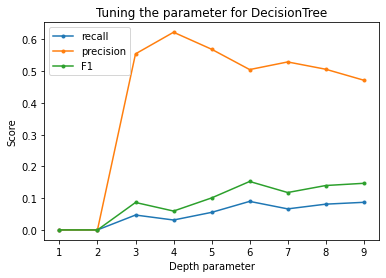

In [36]:
DT_parameter(X_train_down,X_test,y_train_down,y_test)

- With the increasing of max_depth, the recall wave and have 2 peaks. The precision and F1 seem increase from the beginning, flatten in the middle reach peak and then drop down.
-  We want to have a high recall, so max_depth should be set at 4.

Train accuracy: 72.370
Test accuracy: 70.662


predicted 0  predicted 1
true 0        44701        18970
true 1         1525         4663

Recall score of test: 75.4%
Precision score of test: 19.7%
F1 score of test: 31.3%


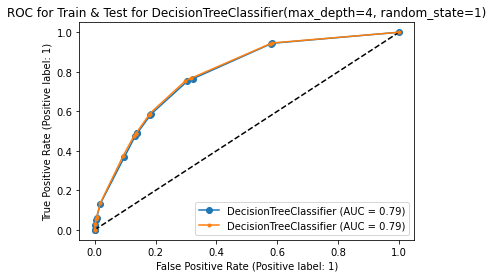

DecisionTreeClassifier(max_depth=4, random_state=1)

In [92]:
score_roc_model(X_train_down,X_test,y_train_down,y_test,DecisionTreeClassifier(max_depth=4,random_state=1))

- The train accuracy is high. There seems no obvious overfitting.
- The recall is as high as 75.4%. The precision and accuracy decrease.
- ROC curve don't vary that much.

##### Upsampling
Applying the `DT_parameter` function created above to plot the curve of recall, precision and F1.

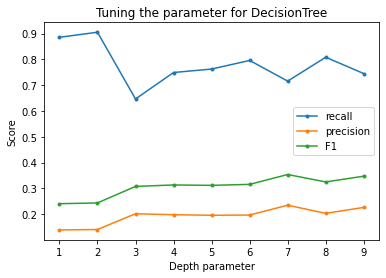

In [38]:
DT_parameter(X_train_up,X_test,y_train_up,y_test)

- The visualization looks the same as the previous one.
- With the increasing of max_depth, the recall wave and have 2 peaks. The precision and F1 seem increase from the beginning, flatten in the middle reach peak and then decease a little.
- We want to have a high recall, so max_depth should be set at 2 or 6. To avoid overfitting, let's set max_depth to 6.

Train accuracy: 73.686
Test accuracy: 69.464


predicted 0  predicted 1
true 0        43603        20068
true 1         1264         4924

Recall score of test: 79.6%
Precision score of test: 19.7%
F1 score of test: 31.6%


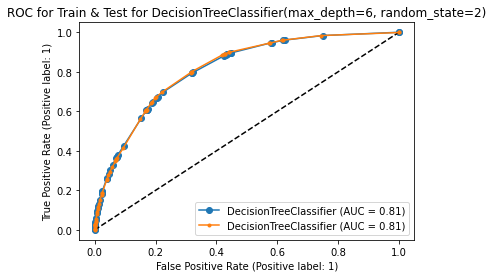

DecisionTreeClassifier(max_depth=6, random_state=2)

In [94]:
score_roc_model(X_train_up,X_test,y_train_up,y_test,DecisionTreeClassifier(max_depth=6,random_state=2)) 

- The train accuracy is 73% and test accuracy is 70%. There seems a little overfitting.
- The recall is as high as 79.6%. So far, it's the highest. But the precision and accuracy decrease.
- ROC curve don't vary that much.

Let's try another model.

#### KNN Model

Let's use the function to get the score, confusion matrix and plot the ROC curve for KNN.

In [40]:
# Defining a function that will automatically plot the curve of recall, precision and F1
def KNN_parameter(X_train,X_test,y_train,y_test):
    """
    The function takes splitted train, test data(both X and y), fit model and plot the curve of recall, precision and F1.

    """
    # Create lists to hold scores
    recall=[]
    precision=[]
    f1=[]
    # Generate a for loop for different n_neighbors
    for n in range(1,20,2):
        #Instantiate and fit
        KNN_model =KNeighborsClassifier(n_neighbors=n)
        KNN_model.fit(X_train,y_train)

        # Predict classification
        y_test_pred= KNN_model.predict(X_test)
        # Append Scores to lists
        recall.append(recall_score(y_test, y_test_pred))
        precision.append(precision_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
    # Plot
    plt.figure()
    plt.plot(range(1,20,2),recall,label='recall',marker='.')
    plt.plot(range(1,20,2),precision,label='precision',marker='.')
    plt.plot(range(1,20,2),f1,label='F1',marker='.')
    plt.ylabel("Score")
    plt.xlabel("n_neighbors parameter")
    plt.title("Tuning the parameter for KNN")
    plt.legend()
    plt.show()
    # Return none
    return None

##### Downsampling

Applying the function(`KNN_parameter`) created above to plot the curve of recall, precision and F1.

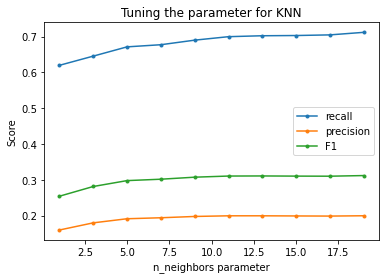

In [99]:
KNN_parameter(X_train_down,X_test,y_train_down,y_test)

- When n_neighbors value increase, all the score vary little. The recall reach highest at 11.
- We want to have a high recall, so n_neighbors should be set at 11.

Train accuracy: 76.521
Test accuracy: 72.825


predicted 0  predicted 1
true 0        46458        17213
true 1         1771         4417

Recall score of test: 71.4%
Precision score of test: 20.4%
F1 score of test: 31.8%


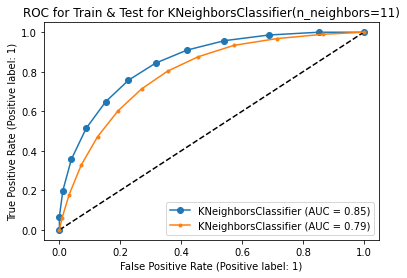

KNeighborsClassifier(n_neighbors=11)

In [100]:
score_roc_model(X_train_down,X_test,y_train_down,y_test,KNeighborsClassifier(n_neighbors=11))

- The train accuracy is 76% and test accuracy is 72%. There seems some overfitting.
- The recall is 71%. The precison is 20%.
- ROC curve of the train performs better than the test.

##### Upsampling

Applying the function(`KNN_parameter`) created above to plot the curve of recall, precision and F1.

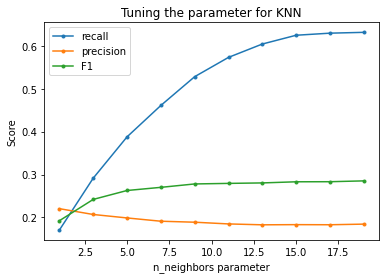

In [102]:
KNN_parameter(X_train_up,X_test,y_train_up,y_test)

- When n_neighbors increase, the recall increase greatly and then flattens when n_neighbors equal to 15. The precision drop a little from the beginning to the end. The F1 increase a little and then flatten.
- We want to have a high recall, so I set n_neighbors should to 15.

Train accuracy: 84.317
Test accuracy: 69.383


predicted 0  predicted 1
true 0        44396        19275
true 1         2114         4074

Recall score of test: 65.8%
Precision score of test: 17.4%
F1 score of test: 27.6%


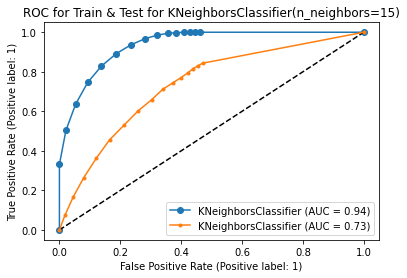

KNeighborsClassifier(n_neighbors=15)

In [44]:
score_roc_model(X_train_up,X_test,y_train_up,y_test,KNeighborsClassifier(n_neighbors=15))

- The train accuracy is 84% and test accuracy is 69%. Huge overfitting.
- The recall is 66%. 
- ROC curve seems overfitting.
- The model don't perform well.

Let's try another model.

#### Random Forest Tree

We'll define a function as in the above process for RandomForestTree.

In [45]:
# Defining a function that will automatically plot the curve of recall, precision and F1
def RF_parameter(X_train,X_test,y_train,y_test):
    """
    The function takes splitted train, test data(both X and y), fit model and plot the curve of recall, precision and F1.

    """
    # Create lists to hold scores
    recall=[]
    precision=[]
    f1=[]
    # Generate a for loop for different n
    for n in range(1,50,2):
        #Instantiate and fit
        RF_model =RandomForestClassifier(n_estimators=n)
        RF_model.fit(X_train,y_train)

        # Predict classification
        y_test_pred= RF_model.predict(X_test)
        # Append Score to list
        recall.append(recall_score(y_test, y_test_pred))
        precision.append(precision_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
    # Plot
    plt.figure()
    plt.plot(range(1,50,2),recall,label='recall',marker='.')
    plt.plot(range(1,50,2),precision,label='precision',marker='.')
    plt.plot(range(1,50,2),f1,label='F1',marker='.')
    plt.ylabel("Score")
    plt.xlabel("n_estimators parameter")
    plt.title("Tuning the parameter for Random Forest")
    plt.legend()
    plt.show()
    # Return none
    return None

##### Original data
Use the function `score_roc_model` to get the score, confusion matrix and plot the ROC curve for Random Forest.

Train accuracy: 99.971
Test accuracy: 91.144


predicted 0  predicted 1
true 0        63178          493
true 1         5694          494

Recall score of test: 8.0%
Precision score of test: 50.1%
F1 score of test: 13.8%


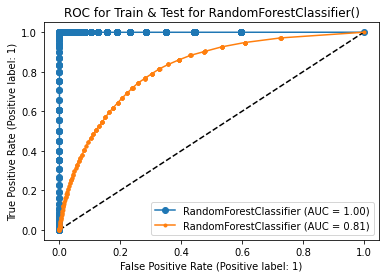

RandomForestClassifier()

In [104]:
score_roc_model(X_train,X_test,y_train,y_test,RandomForestClassifier())

- From the accuracy of the train and test, we see huge overfitting.
- The recall is quite low. The model is not good enough.

##### Downsampling
Applying the function(`RF_parameter`) created above to plot the curve of recall, precision and F1

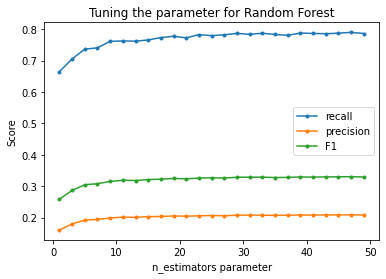

In [106]:
RF_parameter(X_train_down,X_test,y_train_down,y_test)

- With the increase of n_estimators, all the scores increase at first and flatten afterward. 
- We'll set the recall to 13, as the recall is higher.

Train accuracy: 99.495
Test accuracy: 89.918


predicted 0  predicted 1
true 0        61625         2046
true 1         4997         1191

Recall score of test: 19.2%
Precision score of test: 36.8%
F1 score of test: 25.3%


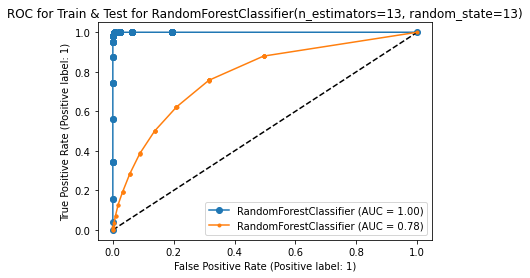

RandomForestClassifier(n_estimators=13, random_state=13)

In [48]:
score_roc_model(X_train_down,X_test,y_train_down,y_test,RandomForestClassifier(n_estimators=13,random_state=13))

- The train accuracy is 99% and test accuracy is 89%. Huge overfitting.
- The recall is 37%. The model doesn't perform well.

##### Upsampling
Applying the function(RF_parameter) created above to plot the curve of recall, precision and F1

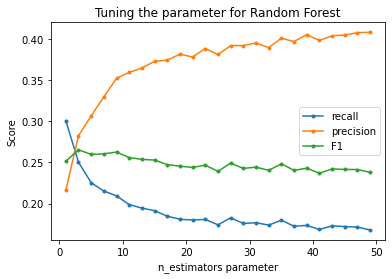

In [49]:
RF_parameter(X_train_up,X_test,y_train_up,y_test)

With the increase of n_estimators, the recall increase, but the highest recall is only 40%. The model doesn't perform well.

Train accuracy: 99.985
Test accuracy: 90.540


predicted 0  predicted 1
true 0        62256         1415
true 1         5194          994

Recall score of test: 16.1%
Precision score of test: 41.3%
F1 score of test: 23.1%


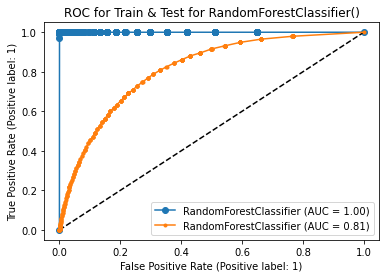

RandomForestClassifier()

In [50]:
score_roc_model(X_train_up,X_test,y_train_up,y_test,RandomForestClassifier())

- This model is overfitting and doesn't perform well. 
- The recall is low.


In next step, we'll use pipeline to get the best performance.

#### Pipeline

In [51]:
# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline
# To try scaling the data in various ways
from sklearn.preprocessing import MinMaxScaler
# To try dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.svm import SVC
# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [52]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
my_pipeline = Pipeline([('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

In [137]:
# Let's try the same range of C values from earlier
c_values = [ .0001, .001, .01,0.1, 1]
depths= range(5,12)
neighbors= range(10,16)
# Parameter grid
logreg_param_grid = [
     
    # l1 without PCA
    {
     'scaler': [None, StandardScaler(), MinMaxScaler()],
     'dim_reducer': [None,PCA()],
     'model': [LogisticRegression( random_state=1, n_jobs=-1)],
     'model__C': c_values,
     'model__penalty':['l1','l2'],
     'model__class_weight' :[ {0:9,1:1}]
    },
    
    
    # l2 DecisionTreeClassifier
    {
     'scaler': [None],
     'dim_reducer': [None],
     'model': [DecisionTreeClassifier(random_state=1)],
     'model__max_depth': depths
    },
    
    {
    'scaler': [None,StandardScaler(),  MinMaxScaler()],
    'dim_reducer': [PCA(), None],
    'model': [KNeighborsClassifier()],
    'model__n_neighbors': neighbors
    },
    
    {
    'scaler': [None],
    'dim_reducer': [None],
    'model': [RandomForestClassifier(random_state=1)],
    'model__n_estimators': [10, 50, 100, 250],
    'model__class_weight':[None,{0:1,1:1},{0:5,1:1}, {0:10,1:1}]
        
    }

]

In [138]:
# Instantiate the log reg grid search                
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, scoring='recall',cv=5, n_jobs=-1, verbose=0)

In [139]:
# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train_down, y_train_down)

In [140]:
# Get the best parameters
fitted_logreg_gs.best_params_

{'dim_reducer': None,
 'model': RandomForestClassifier(class_weight={0: 10, 1: 1}, n_estimators=250,
                        random_state=1),
 'model__class_weight': {0: 10, 1: 1},
 'model__n_estimators': 250,
 'scaler': None}

In [141]:
# Get the best score
fitted_logreg_gs.best_score_

0.8078383838383839

In [142]:
print('Train Accuracy:',fitted_logreg_gs.score(X_train_down,y_train_down))
print("Train Precision:",precision_score(fitted_logreg_gs.predict(X_train_down), y_train_down))
print("Train Recall:",recall_score(fitted_logreg_gs.predict(X_train_down), y_train_down))
print("Train ROC AUC Score:",roc_auc_score(fitted_logreg_gs.predict(X_train_down), y_train_down))

print('Train Accuracy:',fitted_logreg_gs.score(X_test,y_test))
print("Test Precision:",precision_score(fitted_logreg_gs.predict(X_test), y_test))
print("Test Recall:",recall_score(fitted_logreg_gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(fitted_logreg_gs.predict(X_test), y_test))

Train Accuracy: 0.9996767676767677
Train Precision: 0.9996767676767677
Train Recall: 1.0
Train ROC AUC Score: 0.9998384360610711
Train Accuracy: 0.8096315449256626
Test Precision: 0.8096315449256626
Test Recall: 0.20431466905917378
Test ROC AUC Score: 0.5891660248114696


The recall of test can be as high as 100%, but the recall of test is only 20%, which means it's overfitting. 

#### Unsupervised learning --clustering
Now let's explore the data using unsupervised learning. We'll only apply the variable without the target. 

We apply with the simplest algorithm, K-Means. Here, recall for K-Means, we specify the number of clusters  𝑘  in advance, so we must determine what we think is the best value for  𝑘 . Iterate over the different values for  𝑘 , and compare the inertias in a scree plot, then we look for the "elbow" in the scree plot to help us choose  𝑘 .

In [80]:
# Load the library
from sklearn.cluster import KMeans

1 2 3 4 5 6 7 8 9 10 11 12 13 14 

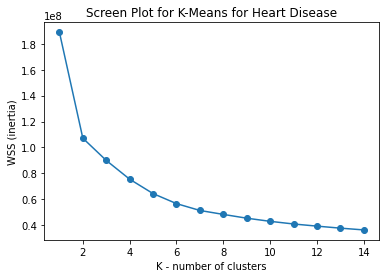

In [81]:
# Range of ks
ks = np.arange(1, 15)
# Inertias
inertias = []

# Create a for loop for n_clusters
for k in ks:
    print(k, end=" ")
    # Instantiate
    kmm = KMeans(n_clusters=k)
    # Fit
    kmm.fit(X)
    # Append inertia
    inertias.append(kmm.inertia_) 
    
# Plot    
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.title('Screen Plot for K-Means for Heart Disease')
plt.xlabel('K - number of clusters')
plt.ylabel('WSS (inertia)')
plt.show()

Looking at the above,we do see a well-defined "elbow" point, which is 3. So the cluster number should be 3. we will take  𝑘=2  and run our final model and store these cluster labels for later use.

In [82]:
#Final model
kmm = KMeans(n_clusters=2)
# Fit
kmm.fit(X)
# Get labels
kmeans_labels = kmm.predict(X) 
kmeans_labels

array([0, 0, 0, ..., 0, 1, 0])

In [83]:
# Make a copy of the df_clean
df_cluster = df_clean.copy()

In [84]:
# Append the cluster labels as new columns
df_cluster['kmeans'] = kmeans_labels

In [66]:
# Check the first rows of the dataframe
df_cluster.head()

Age  Height    BMI  Sleep_time  Physical_unhealth_days  Heart_disease  Sex  \
0   56   170.0  16.60         5.0                     3.0              0    0   
1   65   163.0  29.18         7.0                     0.0              0    0   
4   80   168.0  20.34         7.0                     0.0              0    0   
5   66   175.0  26.58         8.0                    20.0              0    1   
6   75   168.0  24.21         6.0                     0.0              0    0   

   Race_1  Race_2  Race_3  ...  Diabetes_2  Diabetes_3  Diabetes_4  \
0       1       0       0  ...           0           0           0   
1       0       1       0  ...           0           1           0   
4       1       0       0  ...           0           1           0   
5       1       0       0  ...           0           0           0   
6       1       0       0  ...           0           1           0   

   Kidney_disease_1  Kidney_disease_2  Cancer_1  Cancer_2  Stroke_1  Stroke_2  \
0                 0                 1         1         0         0         1   
1                 0                 1         0         1         0         1   
4                 0                 1         0         1         1         0   
5                 0                 1         0         1         0         1   
6                 0                 1         1         0         0         1   

   kmeans  
0       0  
1       0  
4       0  
5       0  
6       0  

[5 rows x 53 columns]

In [67]:
# Count the number of each cluster
df_cluster['kmeans'].value_counts()

0    207220
1    142074
Name: kmeans, dtype: int64

Now we have categorical variables (0/1/2) for the cluster labels and we can analyze the different features across these to see how the different clusters vary and what patterns the algoritm picked up upon.

<Figure size 432x288 with 0 Axes>

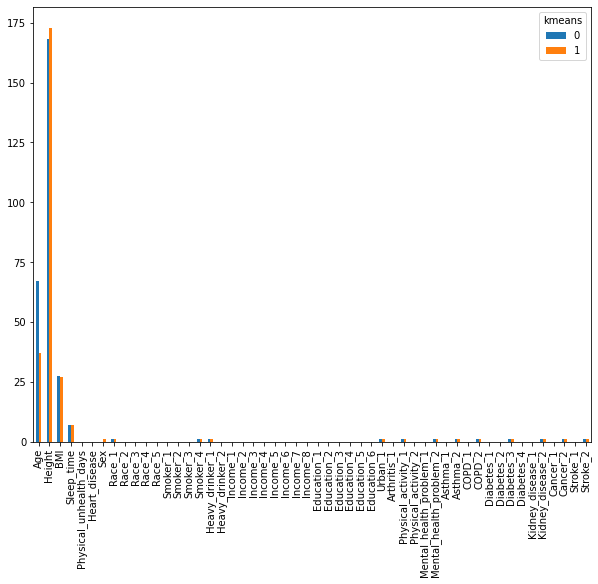

In [68]:
# Plot the figure
plt.figure()
df_cluster.groupby('kmeans').median().T.plot(kind='bar',figsize=(10,8))
plt.show()

Looking at the above, there are fairly clear differences between the two clusters:
- Age is much lower in cluster 1 than cluster 0
- Height, BMI and sleep_time are about equivalent


 We'll plot the variable of each labels individually to take a close look in the following visualizations.

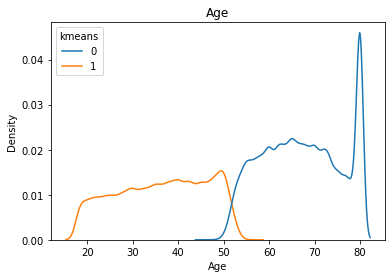

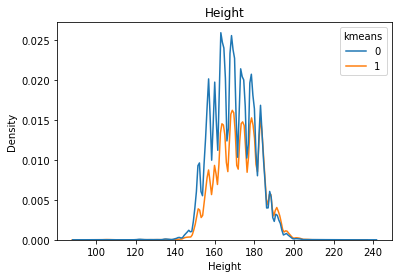

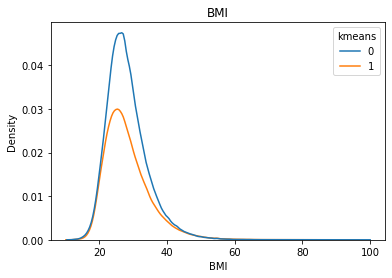

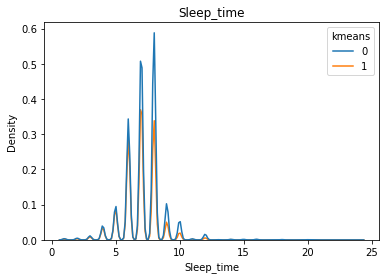

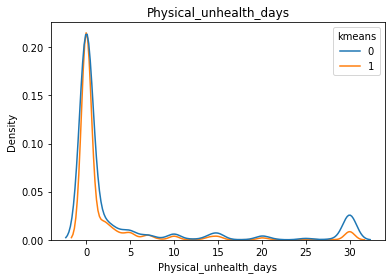

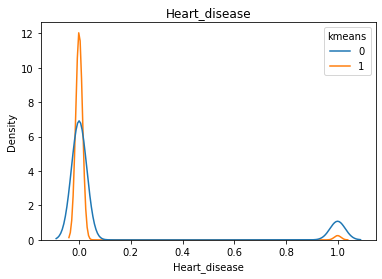

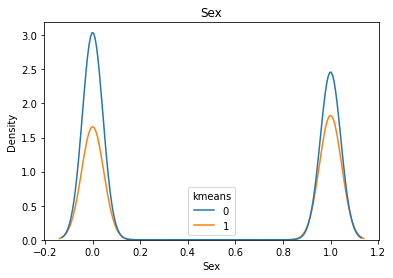

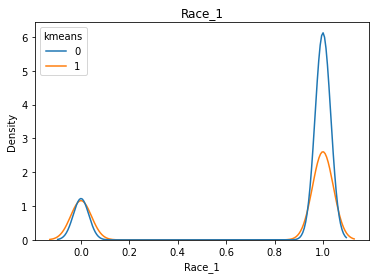

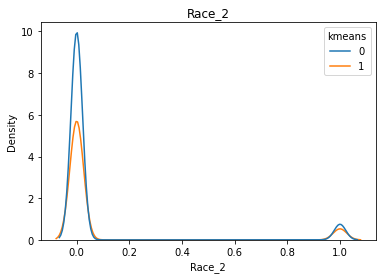

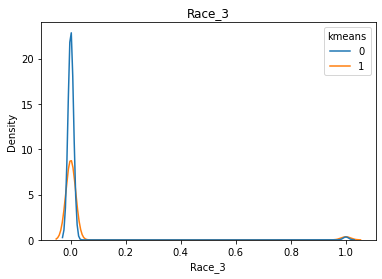

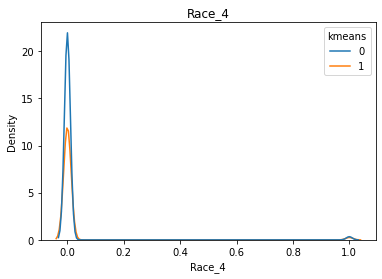

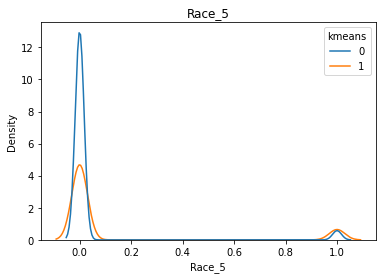

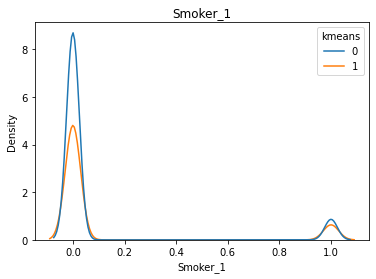

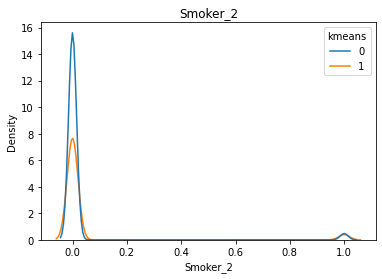

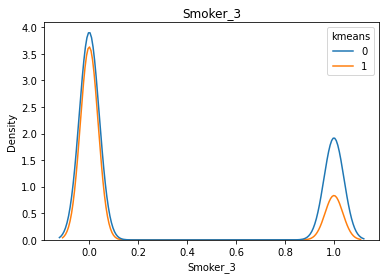

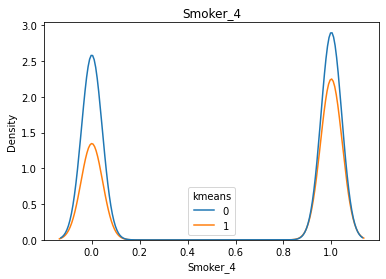

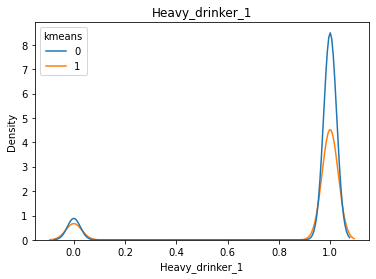

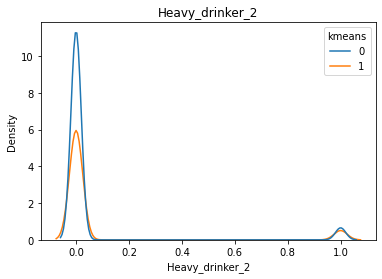

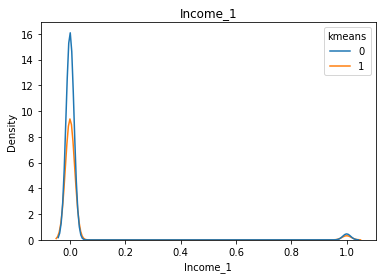

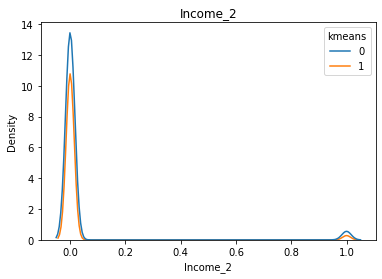

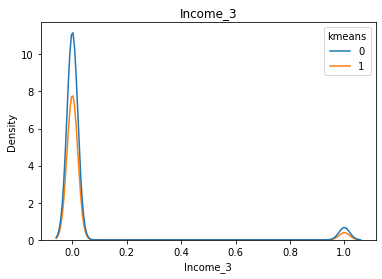

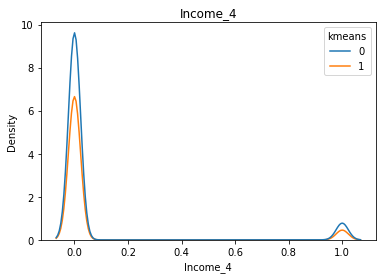

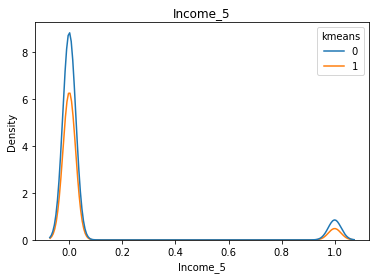

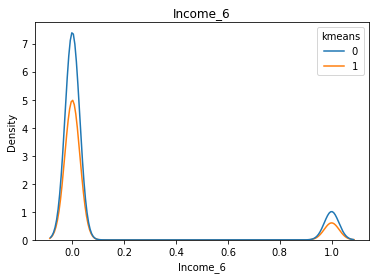

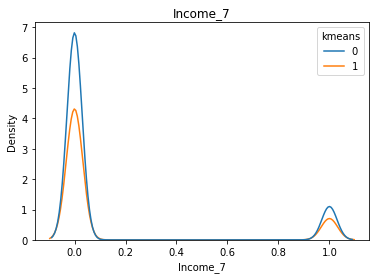

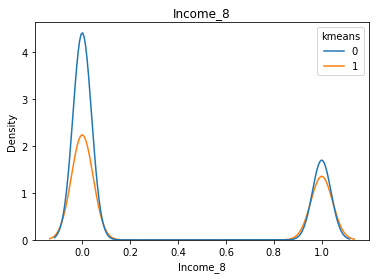

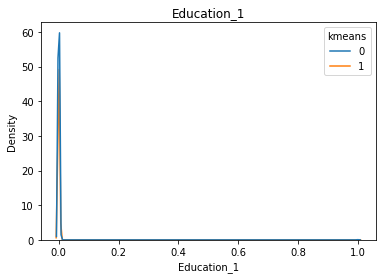

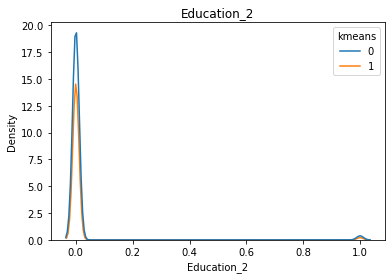

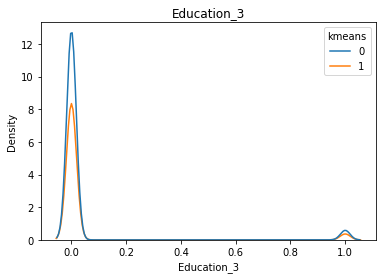

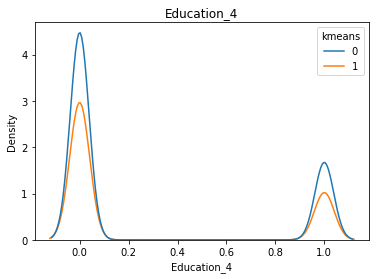

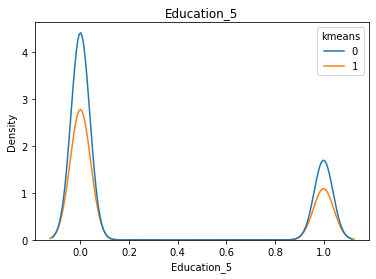

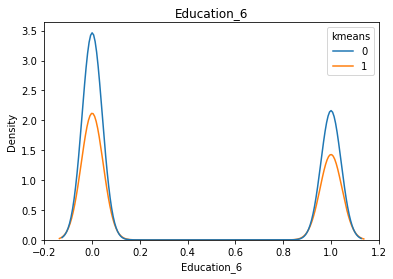

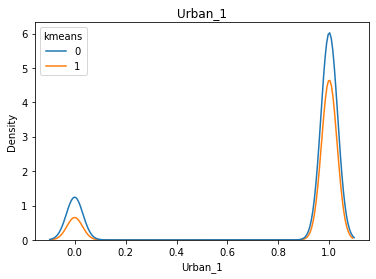

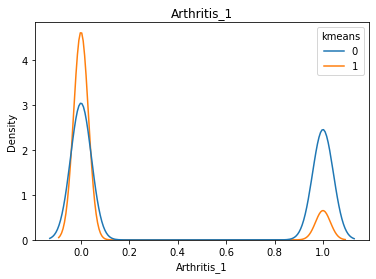

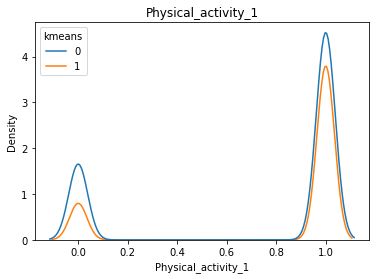

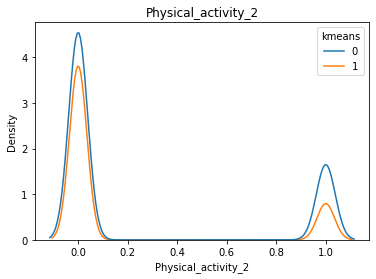

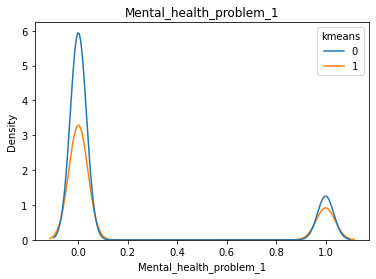

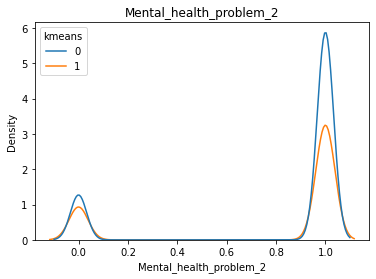

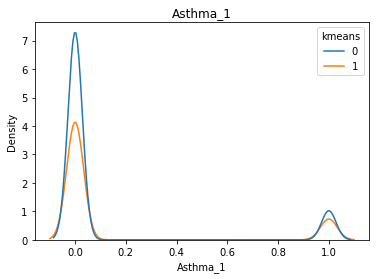

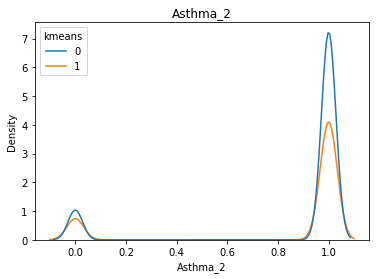

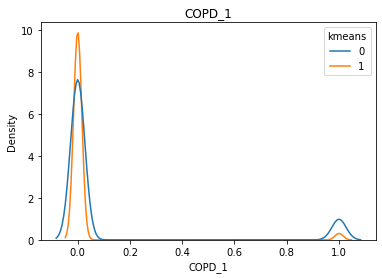

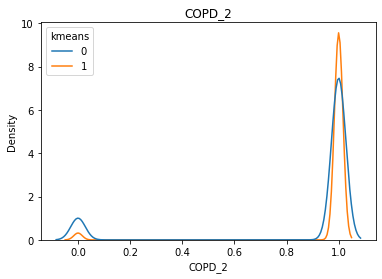

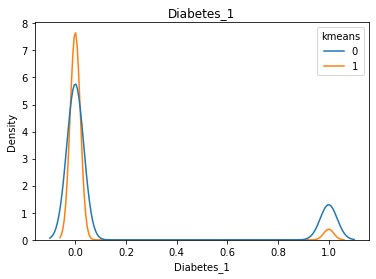

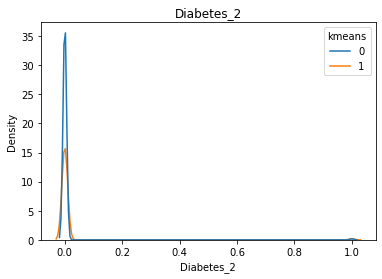

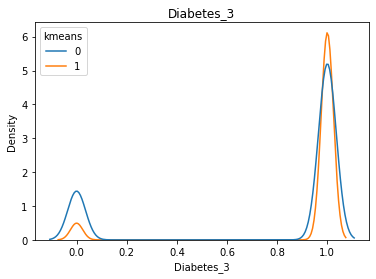

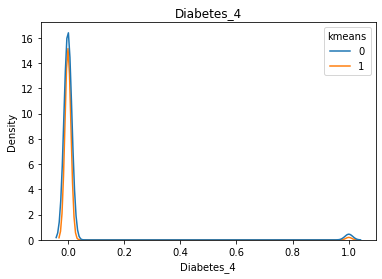

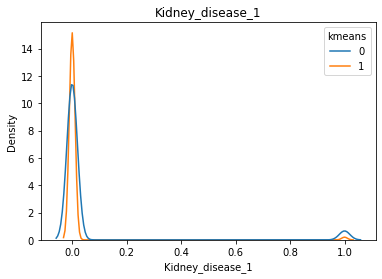

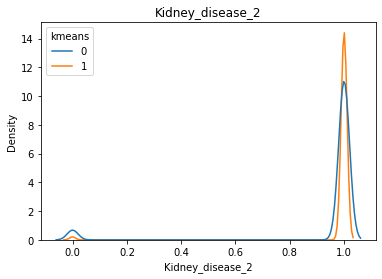

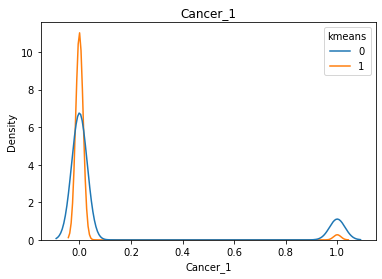

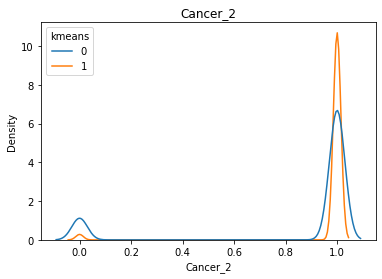

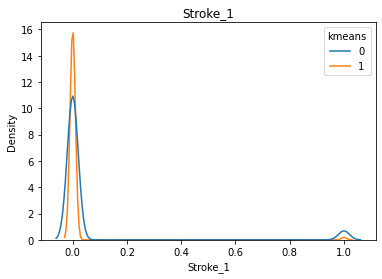

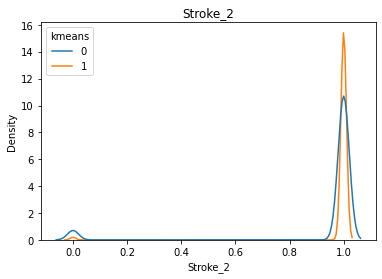

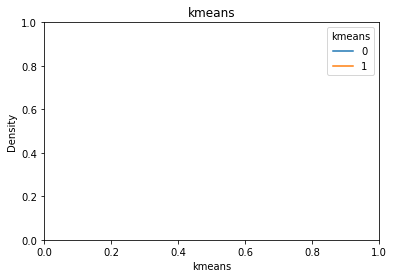

In [69]:
# Distribution of variable by cluster label

# Create a for loop to plot each column
for column in df_cluster:
    sns.kdeplot(data=df_cluster, x=column, hue='kmeans')
    plt.title(column)
    plt.show()

From the above visualizations:
- Age seperate well in two clusters
- Other variables seem overlap in two clusters.

We'll using `PCA` to reduce the dimensions and then visualize the cluster.

In [85]:
# Load the plotly library
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [86]:
# The dataset is too large to visualize, we'll sample a small part of the data
df_cluster_sample= pd.DataFrame(np.array(df_cluster.sample(10000)))
df_cluster_sample.columns= df_cluster.columns

In [72]:
# Check the first few rows
df_cluster.head()

Age  Height    BMI  Sleep_time  Physical_unhealth_days  Heart_disease  Sex  \
0   56   170.0  16.60         5.0                     3.0              0    0   
1   65   163.0  29.18         7.0                     0.0              0    0   
4   80   168.0  20.34         7.0                     0.0              0    0   
5   66   175.0  26.58         8.0                    20.0              0    1   
6   75   168.0  24.21         6.0                     0.0              0    0   

   Race_1  Race_2  Race_3  ...  Diabetes_2  Diabetes_3  Diabetes_4  \
0       1       0       0  ...           0           0           0   
1       0       1       0  ...           0           1           0   
4       1       0       0  ...           0           1           0   
5       1       0       0  ...           0           0           0   
6       1       0       0  ...           0           1           0   

   Kidney_disease_1  Kidney_disease_2  Cancer_1  Cancer_2  Stroke_1  Stroke_2  \
0                 0                 1         1         0         0         1   
1                 0                 1         0         1         0         1   
4                 0                 1         0         1         1         0   
5                 0                 1         0         1         0         1   
6                 0                 1         1         0         0         1   

   kmeans  
0       0  
1       0  
4       0  
5       0  
6       0  

[5 rows x 53 columns]

In [89]:
# Instantiate the PCA
pca_3d= PCA(n_components=3) 
# n_components are set to 3, that's the largest dimensional we can visualize

In [90]:
#  Fit and transform the sampling data
PCs_3d = pd.DataFrame(pca_3d.fit_transform(df_cluster_sample.drop(["kmeans"], axis=1)))

In [91]:
# Create 3 principal component name
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
PCs_3d

PC1_3d     PC2_3d    PC3_3d
0    -10.915581   5.989886 -4.819699
1    -18.451586 -23.030912 -2.721751
2      4.780773  -7.167681 -3.353364
3     -0.009058   7.396026 -3.620200
4    -14.086106  -9.453440 -3.492985
...         ...        ...       ...
9995  27.943163   0.549270 -4.277308
9996  19.116270  15.989848 -0.796959
9997  -8.931955   6.281936 -3.822592
9998  -4.106971  -0.211878 -3.954648
9999   3.822459   0.756869 -3.513408

[10000 rows x 3 columns]

In [92]:
# Concatenate the df_cluster_sample with PCs_3d, so PCs_3d can be used by df_cluster_sample as columns
df_cluster_sample = pd.concat([df_cluster_sample,PCs_3d], axis=1, join='inner')


In [93]:
# Define cluster 0 with kmeans label(0) 
cluster0 = df_cluster_sample[df_cluster_sample["kmeans"] == 0]
cluster1 = df_cluster_sample[df_cluster_sample["kmeans"] == 1]

In [94]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["PC1_3d"],
                    y = cluster0["PC2_3d"],
                    z = cluster0["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["PC1_3d"],
                    y = cluster1["PC2_3d"],
                    z = cluster1["PC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)


data = [trace1, trace2]

title = "Visualizing Clusters in Three Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

- PCA reduces the variable dimension so that we can visualize the clusters. 
- The clusters doesn't separate well. Both of the cluster have some points away from the clusters.

### Conclusions
- The dominant risk factors for the heart disease are age and sex.
- Some other risk factors include smoking, high BMI, diabetes, arthritis, stroke, asthma and kidney and mental issues. 
- Physical activity, enough sleeping time, appropriate BMI, higher education and living in urbanization are good for combating heart disease.
- Imbalanced data should be evaluated not only by accuracy but also recall and ROC.
- Overfitting is common in DecisionTree and KNN models.
- Of all the models, the SVM performs the best, with the test accuracy being 74.0%, the test recall being 78.4% and ROC being 0.83.


### Next step
Make a Streamlit App so that people can evaluate by themselves.